In [1]:
!pip install missingno

In [2]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
#Load Dataset
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
#Generate summary statistics
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#Check on the missing values
missing_values_count = df.isnull().sum()
print("Missing values per column: ")
print(missing_values_count)

Missing values per column: 
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                        

In [7]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#in percent
percent_missing = (total_missing/total_cells)*100
print("Percentage of missing values: ")
print(percent_missing)

Percentage of missing values: 
3.387663330262166


In [8]:
print("Number of duplicated rows: ")
print(df.duplicated().sum())

Number of duplicated rows: 
31994


<Figure size 1200x600 with 0 Axes>

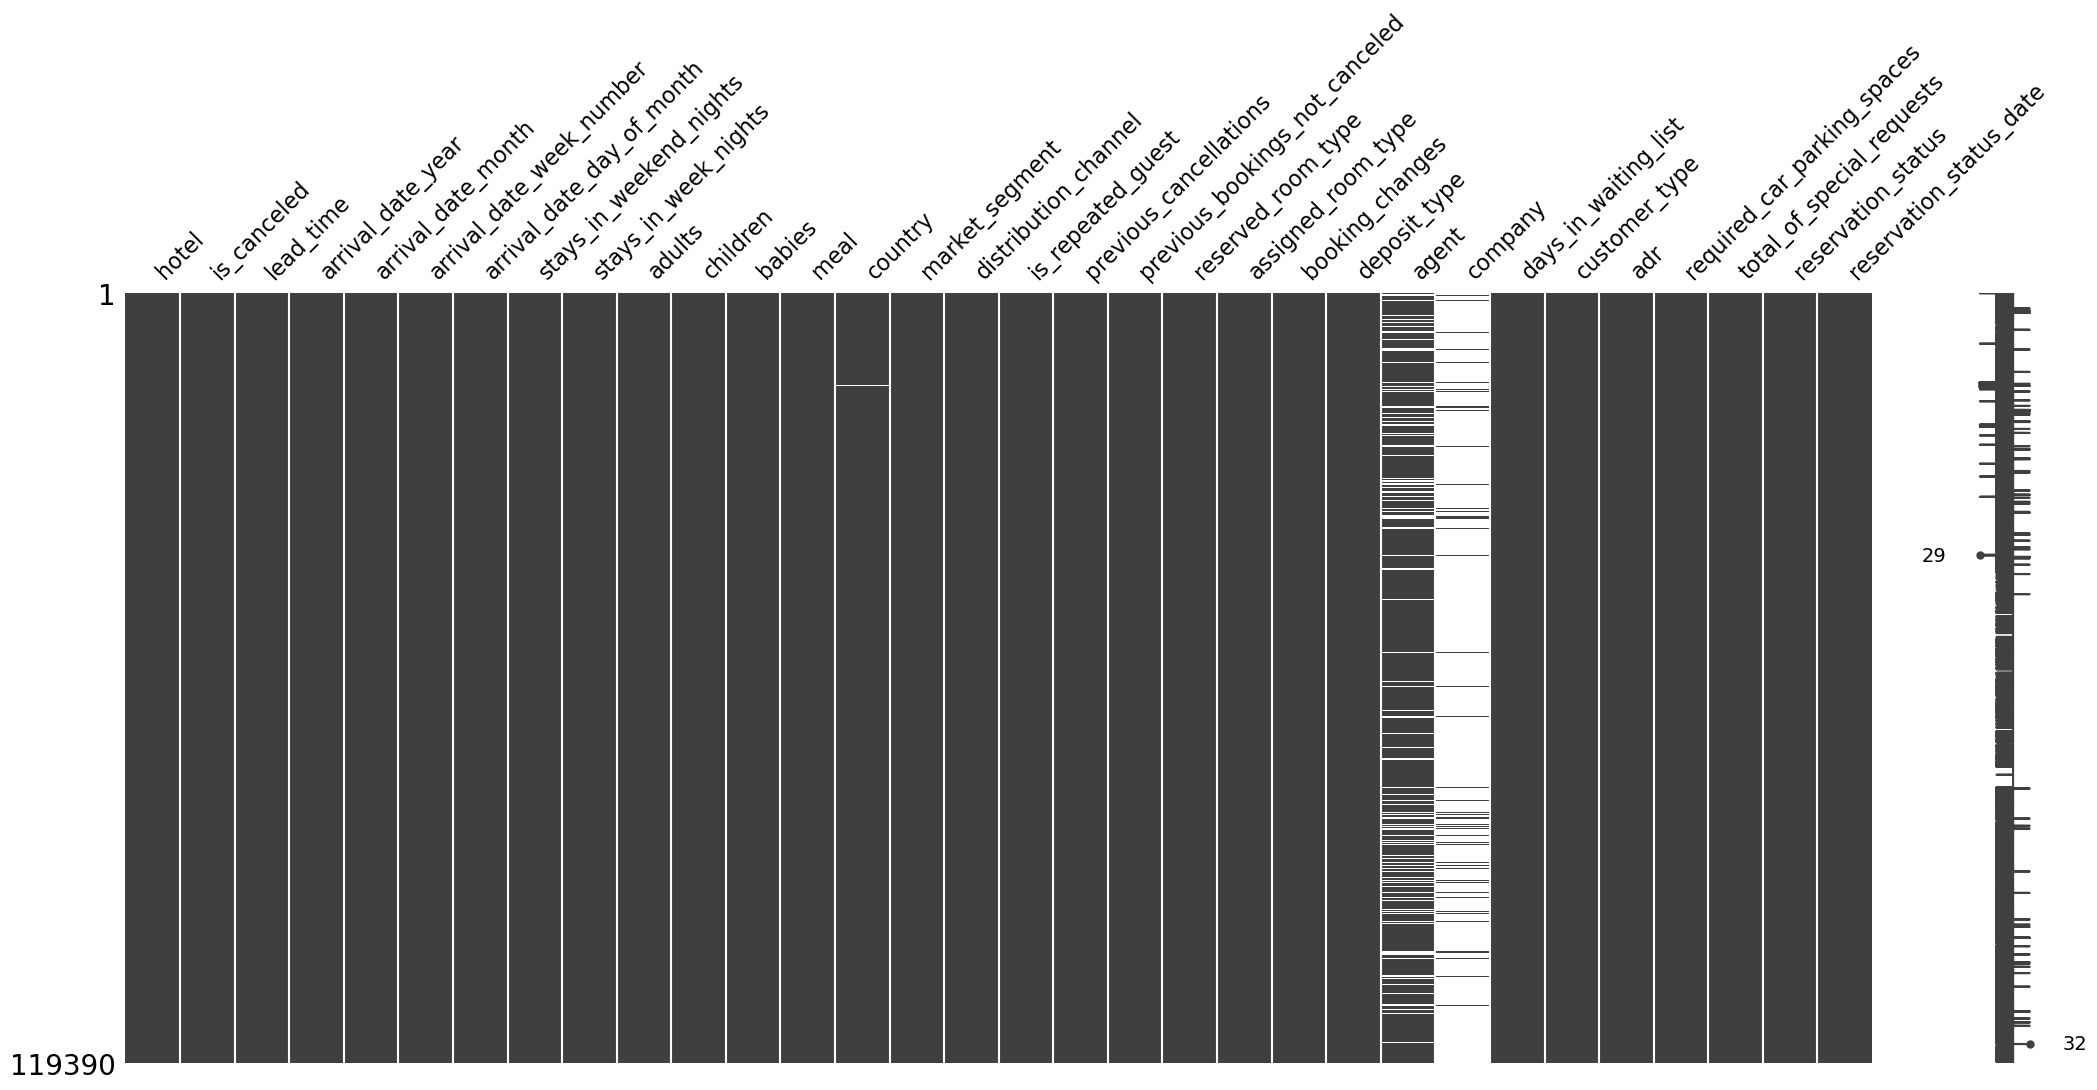

In [9]:
#Some visualization to show the extent and pattern of missing data for each column.
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.show()

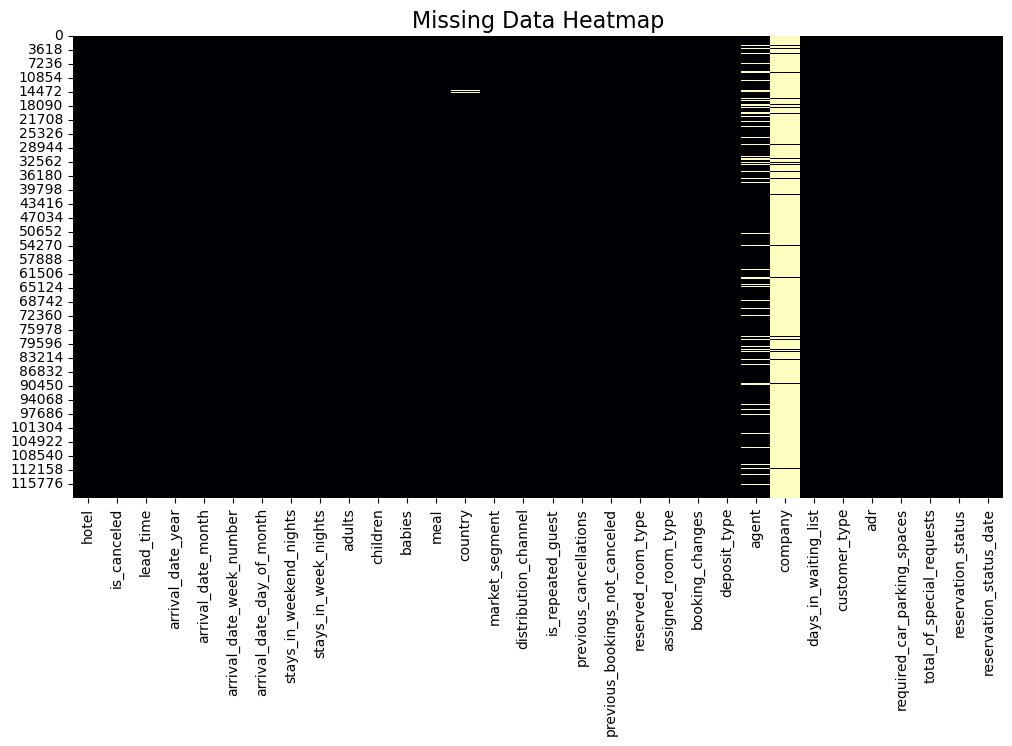

In [10]:
#Using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Data Heatmap", fontsize=16)
plt.show()

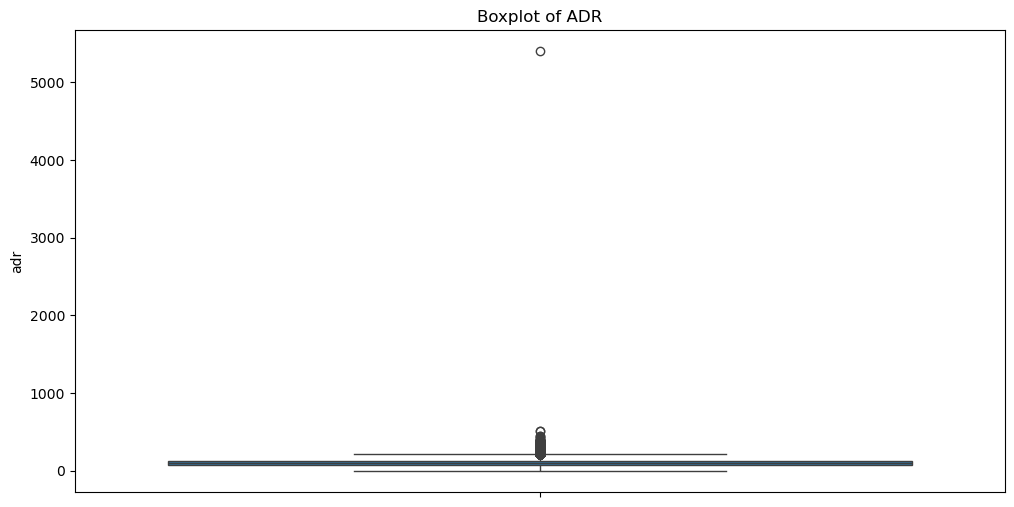

In [11]:
#Detecting the outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['adr'])
plt.title("Boxplot of ADR")
plt.show()

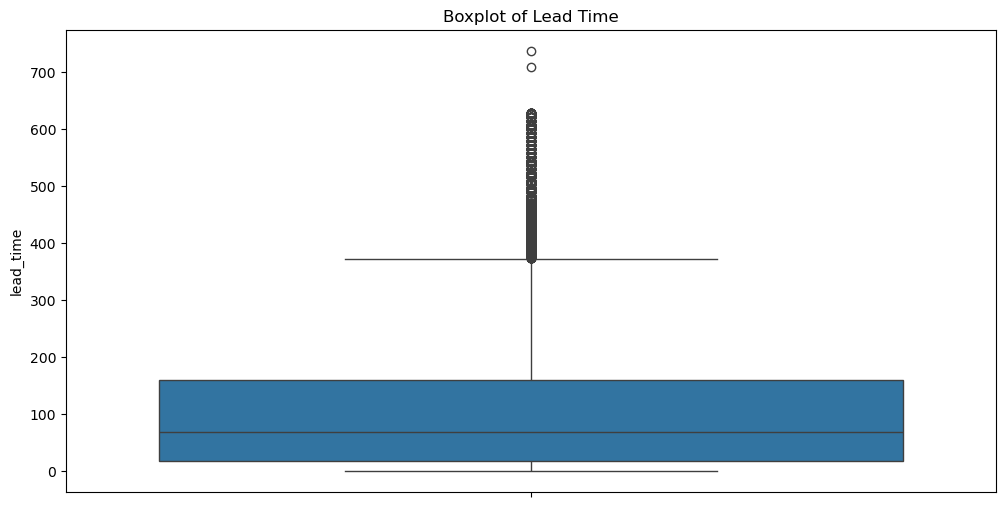

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(df['lead_time'])
plt.title("Boxplot of Lead Time")
plt.show()

In [13]:
#Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {outliers.shape[0]}")

    return outliers

In [14]:
outliers_adr = detect_outliers_iqr(df, "adr")

Column: adr
Q1: 69.29, Q3: 126.0, IQR: 56.709999999999994
Lower Bound: -15.774999999999991, Upper Bound: 211.065
Number of Outliers: 3793


In [15]:
outliers_adr = detect_outliers_iqr(df, "lead_time")

Column: lead_time
Q1: 18.0, Q3: 160.0, IQR: 142.0
Lower Bound: -195.0, Upper Bound: 373.0
Number of Outliers: 3005


## 📝 Findings: Data Quality Issues

### 1. Missing Values
- Several columns contain missing values (NaN).
- The heatmap visualization showed that some columns are more affected than others.
- Missing values will need to be addressed.


### 2. Outliers
- In key numerical columns:
  - **`adr`:** Extreme values detected.
  - **`lead_time`:** Some bookings were made hundreds of days in advance, which is unusual.
- Boxplots highlighted these anomalies, and the IQR method confirmed their presence.
- Outliers may distort the statistical distribution and negatively impact model performance.


### 3. Inconsistent Data
- Certain categorical features (e.g., room type, country, hotel type) appear to have duplicate or inconsistent entries that will require cleaning.


### 4. Potential Data Leakage
- Some columns may contain information that directly reveals the target (cancellation status), so they should be carefully reviewed before modeling.

### 📌 Summary
- Main issues identified so far:
  - **Missing Values**
  - **Outliers**
  - **Inconsistent Categorical Entries**
  - **Potential Data Leakage**

In [17]:
#Handle Missing Values: For company and agent
df['agent'] = df['agent'].fillna(0).astype(int)
df['company'] = df['company'].fillna(0).astype(int)

In [18]:
#For country: fill it with the most frequent country
most_freq_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_freq_country)

#or by add new category "Unknown"
df['country'] = df['country'].fillna("Unknown")

In [19]:
df.shape[0]

119390

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape[0]

87377

In [22]:
df['adr'].max()

5400.0

In [23]:
df['adr'] = df['adr'].apply(lambda x: 1000 if x > 1000 else x)

C:\Users\a\AppData\Local\Temp\ipykernel_23364\4262477825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adr'] = df['adr'].apply(lambda x: 1000 if x > 1000 else x)


In [24]:
df['adr'].max()

1000.0

In [25]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

print(df.dtypes[['reservation_status_date','arrival_date']])

reservation_status_date    datetime64[ns]
arrival_date               datetime64[ns]
dtype: object


C:\Users\a\AppData\Local\Temp\ipykernel_23364\1626323807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
C:\Users\a\AppData\Local\Temp\ipykernel_23364\1626323807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date'] = pd.to_datetime(


In [26]:
#Feature Engineering & Preprocessing
#total guests - check first if any of these columns have missing values or not
print(df['children'].isna().sum())
print(df['adults'].isna().sum())
print(df['babies'].isna().sum())

4
0
0


In [27]:
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']
df['total_guests']

C:\Users\a\AppData\Local\Temp\ipykernel_23364\590479246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']


0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_guests, Length: 87377, dtype: float64

In [28]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights']

C:\Users\a\AppData\Local\Temp\ipykernel_23364\1104536569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_nights, Length: 87377, dtype: int64

In [29]:
df["is_family"] = ((df["children"].fillna(0) + df["babies"]) > 0).astype(int)
df['is_family']

C:\Users\a\AppData\Local\Temp\ipykernel_23364\927130898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_family"] = ((df["children"].fillna(0) + df["babies"]) > 0).astype(int)


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_family, Length: 87377, dtype: int32

In [30]:
print(df[['meal', 'market_segment','distribution_channel']].head(10))

   meal market_segment distribution_channel
0    BB         Direct               Direct
1    BB         Direct               Direct
2    BB         Direct               Direct
3    BB      Corporate            Corporate
4    BB      Online TA                TA/TO
6    BB         Direct               Direct
7    FB         Direct               Direct
8    BB      Online TA                TA/TO
9    HB  Offline TA/TO                TA/TO
10   BB      Online TA                TA/TO


In [31]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0,2,0


In [32]:
#one-hot encoding for low-cardinality categories
df_encoded = pd.get_dummies(df, columns=['meal','market_segment','distribution_channel'],drop_first=True)

In [33]:
df_encoded.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,False,True,False,False,False,False,True,False,False,False
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,True,False,False,False,False,True,False,False,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,True,False,False,False,False,False,False,False,False,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,True,False,False,False,True,False


In [34]:
#High-cardinality features like country, apply technique like frequency encoding
country_freq = df['country'].value_counts().to_dict()
df['country_encoded'] = df['country'].map(country_freq)

print(df[['country','country_encoded']].head())

  country  country_encoded
0     PRT            27886
1     PRT            27886
2     GBR            10433
3     GBR            10433
4     GBR            10433


C:\Users\a\AppData\Local\Temp\ipykernel_23364\4228415616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_encoded'] = df['country'].map(country_freq)


In [35]:
#Grouping infrequent categories into an "Other" group.
country_counts = df['country'].value_counts()
df['country_grouped'] = df['country'].apply(lambda x: x if country_counts[x] > 500 else "Other")
df['country_grouped'].value_counts().head()

C:\Users\a\AppData\Local\Temp\ipykernel_23364\3800361646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_grouped'] = df['country'].apply(lambda x: x if country_counts[x] > 500 else "Other")


country_grouped
PRT      27886
GBR      10433
FRA       8837
ESP       7252
Other     6534
Name: count, dtype: int64

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests,total_nights,is_family,country_encoded,country_grouped
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0,0,27886,PRT
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,2015-07-01,2.0,0,0,27886,PRT
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,2015-07-01,1.0,1,0,10433,GBR
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,2015-07-01,1.0,1,0,10433,GBR
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,2015-07-01,2.0,2,0,10433,GBR


In [87]:
#Standardize categorical variables.
df['meal'] = df['meal'].str.strip().str.upper()
df['market_segment'] = df['market_segment'].str.strip().str.title()

C:\Users\a\AppData\Local\Temp\ipykernel_23364\4227073636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meal'] = df['meal'].str.strip().str.upper()
C:\Users\a\AppData\Local\Temp\ipykernel_23364\4227073636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_segment'] = df['market_segment'].str.strip().str.title()


In [89]:
print(df['meal'].unique())
print(df['market_segment'].unique())

['BB' 'FB' 'HB' 'NO MEAL' 'UNDEFINED']
['Direct' 'Corporate' 'Online Ta' 'Offline Ta/To' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [91]:
meal_mapping = {
    "SC": "No Meal",
    "Undefined": "No Meal"
}
df['meal'] = df['meal'].replace(meal_mapping)

C:\Users\a\AppData\Local\Temp\ipykernel_23364\393033326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meal'] = df['meal'].replace(meal_mapping)
